In [6]:
from vierlinden.data.loader import VierlindenDataProcessor
from vierlinden.config import model_output_path
from vierlinden.model.model import NHiTSTrainingWrapper
from pytorch_forecasting.metrics import QuantileLoss, MAE, MASE, RMSE
import torch

target = 'PV_18_Fuellstand_RUEB_1_ival'
model_filepath = model_output_path + "/NHiTS_"  + target + "_model.pt"

seed = 42

context_length = 50
prediction_length = 10
batch_size = 128
num_workers = 8 #18

dp = VierlindenDataProcessor()
vierlinden_data = dp.load_processed_data()
vierlinden_data = dp.prepare_for_target(vierlinden_data, target)

train_data, test_data = dp.split_data(vierlinden_data, split_date='2023-01-01')
display(train_data)
display(test_data)

INFO:vierlinden.data.loader:Data loaded successfully from E:/Users/Vipin/Documents/BHT/CalgoLab/RIWWER/data
INFO:vierlinden.data.loader:Datetime processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.


,Datetime,Herzog_Schieber_Position_pval,Herzog_Oberwasser_pval,Herzog_Unterwasser_pval,Herzog_Durchflußmenge_pval,Herzog_Berechnete_Durchflussmenge_pval,FLP_Hohenstand_Pumpensumpf_pval,FLP_Hohenstand_Pumpensumpf_pval_was_nan,FLP_P3_pval,FLP_P3_pval_was_nan,...,PV_16_Regenueberlauf_Menge_ival,PV_16_Regenueberlauf_Menge_ival_was_nan,PV_18_Fuellstand_RUEB_1_ival,PV_18_Fuellstand_RUEB_1_ival_was_nan,PV_19_Fuellstand_RUEB_2_ival,PV_19_Fuellstand_RUEB_2_ival_was_nan,PV_20_Fuellstand_RUEB_3_ival,PV_20_Fuellstand_RUEB_3_ival_was_nan,PV_25_Fuellstand_RRB_ival,PV_25_Fuellstand_RRB_ival_was_nan
0,2021-01-01 00:00:00,100.0,8.0761,5.8152,7.6009,7.5300,84.263300,True,0.0,True,...,0.0,False,3.16,False,3.08,False,2.72,False,1.47,False
1,2021-01-01 01:00:00,100.0,8.0841,5.3923,7.1753,8.0380,84.263300,True,0.0,True,...,0.0,False,3.16,False,3.08,False,2.72,False,1.47,False
2,2021-01-01 02:00:00,100.0,7.9639,5.1718,6.4808,7.7368,84.263300,True,0.0,True,...,0.0,False,3.16,False,3.08,False,2.72,False,1.47,False
3,2021-01-01 03:00:00,100.0,7.6138,5.0000,5.2214,6.1928,84.263300,True,0.0,True,...,0.0,False,3.16,False,3.08,False,2.72,False,1.47,False
4,2021-01-01 04:00:00,100.0,6.9667,4.5230,3.5886,4.3735,84.263300,True,0.0,True,...,0.0,False,3.16,False,3.08,False,2.72,False,1.47,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 19:00:00,100.0,10.3835,6.6241,6.3373,13.6310,158.563695,True,0.0,True,...,0.0,False,1.29,False,1.42,False,0.76,False,1.29,False
17516,2022-12-31 20:00:00,100.0,9.1777,5.7780,3.9324,11.2529,158.246593,True,0.0,True,...,0.0,False,1.29,False,1.42,False,0.76,False,1.29,False
17517,2022-12-31 21:00:00,100.0,11.0793,7.1707,10.4482,14.7971,157.929492,True,0.0,True,...,0.0,False,1.29,False,1.42,False,0.76,False,1.29,False
17518,2022-12-31 22:00:00,100.0,8.3543,5.2011,2.3268,10.0161,157.612390,True,0.0,True,...,0.0,False,1.29,False,1.42,False,0.76,False,1.29,False


,Datetime,Herzog_Schieber_Position_pval,Herzog_Oberwasser_pval,Herzog_Unterwasser_pval,Herzog_Durchflußmenge_pval,Herzog_Berechnete_Durchflussmenge_pval,FLP_Hohenstand_Pumpensumpf_pval,FLP_Hohenstand_Pumpensumpf_pval_was_nan,FLP_P3_pval,FLP_P3_pval_was_nan,...,PV_16_Regenueberlauf_Menge_ival,PV_16_Regenueberlauf_Menge_ival_was_nan,PV_18_Fuellstand_RUEB_1_ival,PV_18_Fuellstand_RUEB_1_ival_was_nan,PV_19_Fuellstand_RUEB_2_ival,PV_19_Fuellstand_RUEB_2_ival_was_nan,PV_20_Fuellstand_RUEB_3_ival,PV_20_Fuellstand_RUEB_3_ival_was_nan,PV_25_Fuellstand_RRB_ival,PV_25_Fuellstand_RRB_ival_was_nan
17520,2023-01-01 00:00:00,100.0,8.0000,5.0000,1.3774,9.6796,156.978187,True,0.0,True,...,0.0,False,1.29,False,1.42,False,0.76,False,1.29,False
17521,2023-01-01 01:00:00,100.0,11.1121,6.9926,12.3593,15.0284,156.661086,True,0.0,True,...,0.0,False,1.29,False,1.42,False,0.76,False,1.29,False
17522,2023-01-01 02:00:00,100.0,8.0518,4.9777,2.1956,9.4436,156.343984,True,0.0,True,...,0.0,False,1.29,False,1.42,False,0.76,False,1.29,False
17523,2023-01-01 03:00:00,100.0,7.8445,4.3878,2.0219,8.8488,156.026883,True,0.0,True,...,0.0,False,1.29,False,1.42,False,0.76,False,1.29,False
17524,2023-01-01 04:00:00,100.0,7.0749,4.1125,0.6367,8.0749,155.709782,True,0.0,True,...,0.0,False,1.29,False,1.42,False,0.76,False,1.29,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,2023-12-31 20:00:00,100.0,9.6343,6.0298,0.0000,12.6065,91.554600,False,0.0,False,...,0.0,False,1.34,False,1.78,False,0.92,False,1.34,False
26277,2023-12-31 21:00:00,100.0,9.0974,5.9716,0.0000,10.9807,89.588000,False,0.0,False,...,0.0,False,1.35,False,1.78,False,0.92,False,1.34,False
26278,2023-12-31 22:00:00,100.0,8.7244,5.6111,0.0000,10.1204,90.629100,False,0.0,False,...,0.0,False,1.35,False,1.78,False,0.92,False,1.34,False
26279,2023-12-31 23:00:00,100.0,8.5567,5.2766,0.0000,10.0989,89.432300,False,0.0,False,...,0.0,False,1.36,False,1.78,False,0.92,False,1.34,False


In [2]:
cuda = torch.cuda.is_available()
print(f'Cuda available: {cuda}')

if cuda:
    print(f'Used GPU device: {torch.cuda.get_device_name(0)}')

    # Set the matrix multiplication precision to 'medium' for better performance uses tensor cores
    torch.set_float32_matmul_precision('medium')

Cuda available: True
Used GPU device: NVIDIA GeForce RTX 3070


In [3]:
train_from_beginning = False

nhits_wrapper = NHiTSTrainingWrapper(train_data, 
                                    target_col = target, 
                                    context_length = context_length, 
                                    prediction_length = prediction_length, 
                                    batch_size = batch_size, 
                                    num_workers = num_workers)
optimal_lr = nhits_wrapper.find_optimal_learningrate(seed = seed)

print(f"Optimal learning rate: {optimal_lr}")

if train_from_beginning:
    best_model = nhits_wrapper.train(optimal_lr, loss = MASE(), seed = seed)
else:
    ckpt_path = "E:/Users/Vipin/Documents/BHT/CalgoLab/RIWWER/model_output/training_logs/lightning_logs/version_0/checkpoints/epoch=86-step=9483.ckpt"
    best_model = nhits_wrapper.continue_training_from_ckpt(ckpt_path=ckpt_path,
                                                           learning_rate=optimal_lr,
                                                           loss=MASE(),
                                                           seed=seed
                                                           )
    

INFO:vierlinden.model.model:Training and validation data and data loaders created successfully.
Seed set to 42


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
INFO:vierlinden.model.model:Start setting up trainer and network.
Seed set to 42
INFO:vierlinden.model.model:Setup succesful. Starting training procedure.


Optimal learning rate: 7.07945784384138e-05


e:\Users\Vipin\Documents\BHT\CalgoLab\RIWWER\.venv\lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:361: The dirpath has changed from 'E:/Users/Vipin/Documents/BHT/CalgoLab/RIWWER/model_output/training_logs\\lightning_logs\\version_0\\checkpoints' to 'E:/Users/Vipin/Documents/BHT/CalgoLab/RIWWER/model_output/training_logs\\lightning_logs\\version_1\\checkpoints', therefore `best_model_score`, `kth_best_model_path`, `kth_value`, `last_model_path` and `best_k_models` won't be reloaded. Only `best_model_path` will be reloaded.

  | Name            | Type           | Params
---------------------------------------------------
0 | loss            | MASE           | 0     
1 | logging_metrics | ModuleList     | 0     
2 | embeddings      | MultiEmbedding | 0     
3 | model           | NHiTS          | 919 K 
---------------------------------------------------
919 K     Trainable params
0         Non-trainable params
919 K     Total params
3.679     Total estimated model param

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 3.405


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 3.404


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 3.402


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 3.399


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:vierlinden.model.model:Training procedure completed.
INFO:vierlinden.model.model:Cleaning up logging files.
INFO:vierlinden.model.model:Logging files cleaned up.


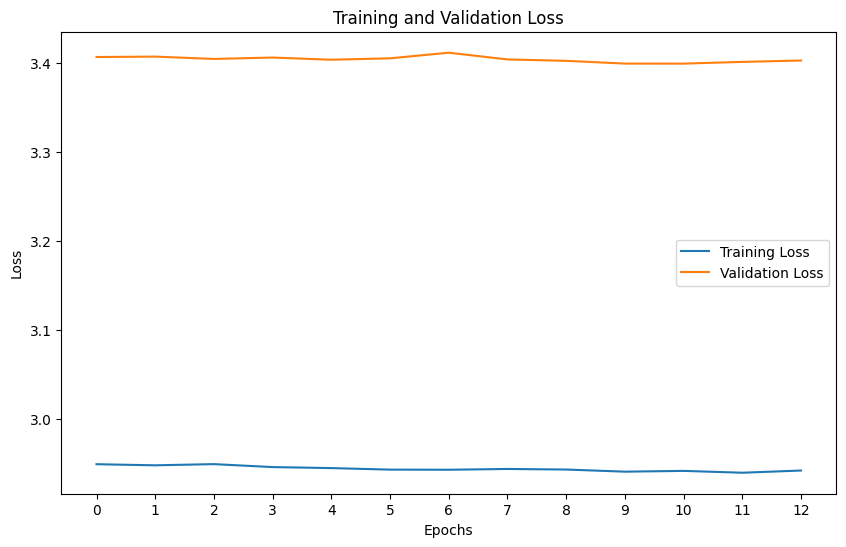

In [4]:
nhits_wrapper.save_trained_model(model_filepath)
nhits_wrapper.plot_training_result()

Baseline MASE: 4.350091022898348


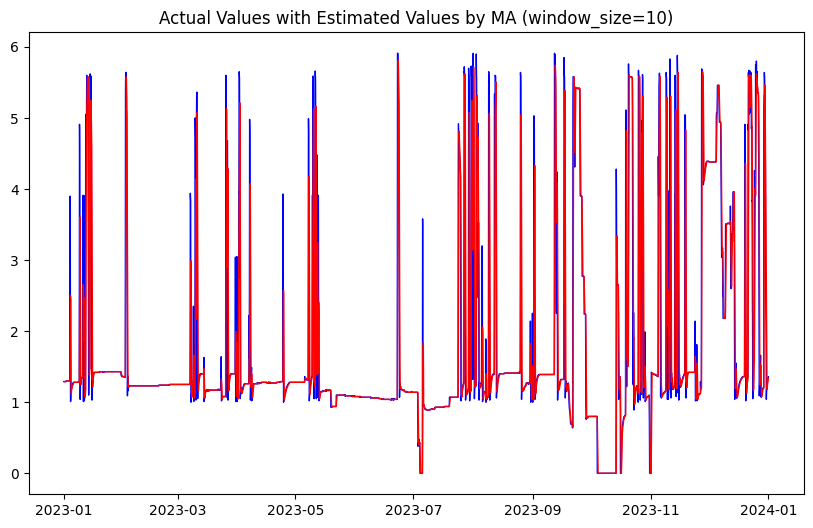

In [7]:
from vierlinden.model.model import MovingAverageBaseline

model = MovingAverageBaseline(test_data, window_size=10, target_col=target, forecast_step_ahead=1)
mase = model.calculate_mase()

print(f'Baseline MASE: {mase}')
model.plot_forecast()

In [11]:
from pytorch_forecasting import NHiTS
from sympy import N
from vierlinden.model.model import NHiTSTrainingWrapper, NHiTSPredictionWrapper

wrapper = NHiTSTrainingWrapper.load_model_wrapper(model_filepath.split('.')[0] + 'wrapper.pkl')

model = NHiTS.load_from_checkpoint(wrapper.final_trainer.checkpoint_callback.best_model_path)
prediction_wrapper = NHiTSPredictionWrapper(model, context_length=context_length, prediction_length=prediction_length, target_col=target)

if test_data is None:
    df = dp.load_processed_data()
    df = dp.prepare_for_target(df, target)
    training_df, test_df = dp.split_data(df, split_date='2023-01-01')
    
prediction_df = prediction_wrapper.predict(test_data)
mase = prediction_wrapper.calculate_mase_loss(1)

print("MASE = ", mase)

e:\Users\Vipin\Documents\BHT\CalgoLab\RIWWER\UT_RIWWER_project\vierlinden\model\model.py:726: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df.fillna(0, inplace=True)
e:\Users\Vipin\Documents\BHT\CalgoLab\RIWWER\.venv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


MASE =  10.34235867909798


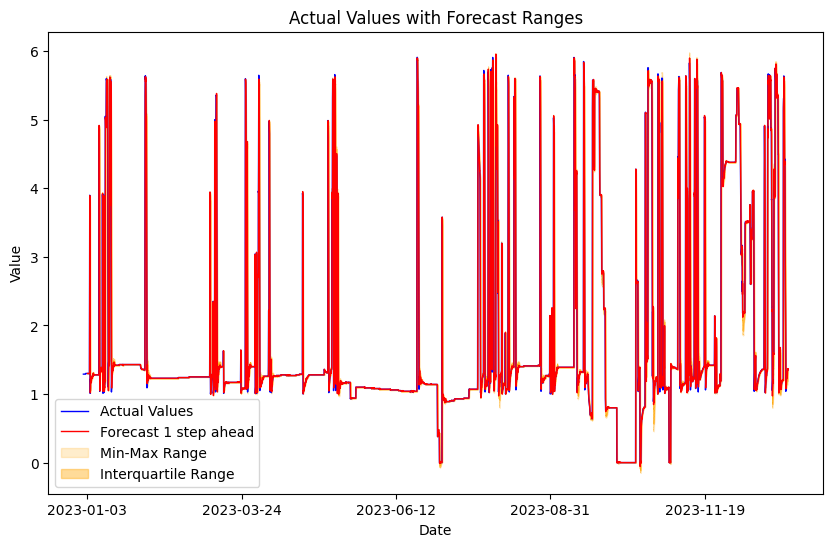

In [7]:
prediction_wrapper.plot_forecast_for_all(forecast_step_ahead=1, plot_forecast_distribution=True)

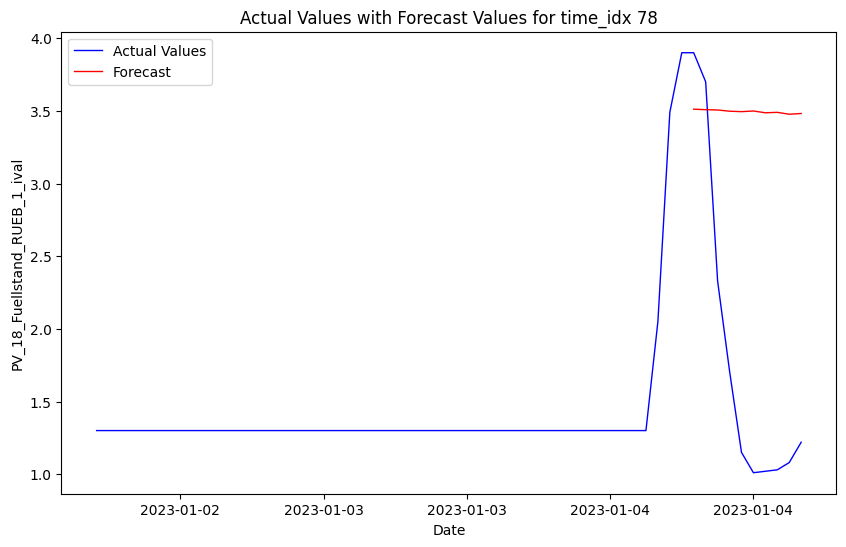

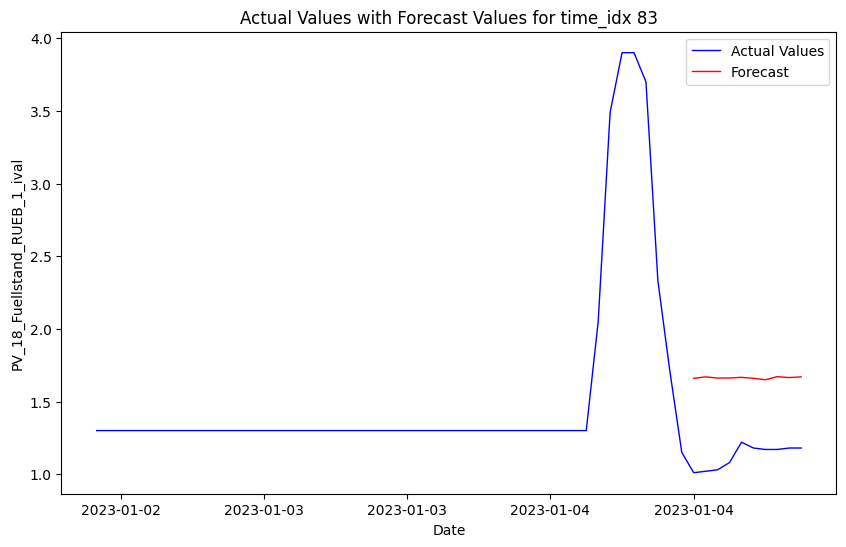

In [8]:
prediction_wrapper.plot_forecast_per_time_idx(78)
prediction_wrapper.plot_forecast_per_time_idx(83)